## Linear Regression and Regularization 
* In this notebook I am going to predict the housing price using the linear regression model.
* this notebook uses linear regression to predict price and L1, L2 regularisation also for optimizing the model 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# reading the csv file with help of read_csv() method
data = pd.read_csv('house-prices-advanced-regression-techniques (1)/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# let's find the info() about the data which will give us the datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
# description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### from the description it is clear that we have lot's independent variables to deal

## Excluding the unnecessary variables (object dtypes)

In [4]:
# let's drop those columns which have the object as data type since 
# we don't really want it to fit the model and Exploration as well
#for c in train.columns:
data = data.select_dtypes(exclude=['object'])
data.head() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [5]:
# let's find the null values present the columns
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### Dropping the column LotFrontage because it has so many null values present, so it is good just to drop the column

In [6]:
# so it is clear LotFrontage and Garageyrblt has null values
# let's drop the column LotFrontage and for GarageYrBlt let's replace Na with mean
data.drop('LotFrontage', inplace=True, axis=1)


In [7]:
# let's check the null values present in data 
data.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [8]:
## droping the futher missing values
data.dropna(axis=0, inplace=True)

In [9]:
print('Number of rows and columns',data.shape)

Number of rows and columns (1371, 37)


In [10]:
data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### As we don't have missing value we should do some exploration and visualizations 

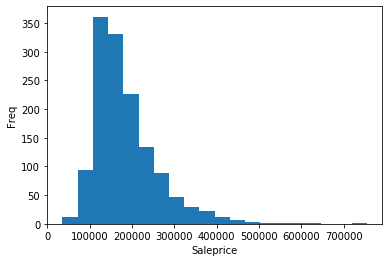

In [11]:
# hist for checking the frequ of the dataset
plt.hist(data['SalePrice'], bins=20)
plt.xlabel('Saleprice')
plt.ylabel('Freq')
plt.show()

The graph is right skewed and let's try to take it's log 
### salesprice data is right skewed 

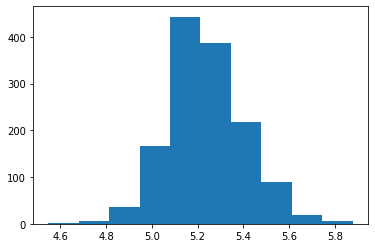

Now it is normally distributed


In [12]:
# trying to normalise the data 
plt.hist(np.log10(data['SalePrice']), bins=10)
plt.show()
print('Now it is normally distributed')

### Here I am trying to check the multicollinearity between independent variables if they are high then I am just deleting it 
* (Have to verify with Ashwini)

In [13]:

import statsmodels.api as sm


names = data.columns
cols_drop = []
for i in range(0, len(names)):
    y = data.loc[:, data.columns == names[i]]
    x = data.loc[:, data.columns != names[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )
    if vif >20:
        cols_drop.append(names[i])


R Square value of Id column is 0.76 keeping all other columns as features
Variance Inflation Factor of Id column is 4.13 

R Square value of MSSubClass column is 0.77 keeping all other columns as features
Variance Inflation Factor of MSSubClass column is 4.38 

R Square value of LotArea column is 0.61 keeping all other columns as features
Variance Inflation Factor of LotArea column is 2.58 

R Square value of OverallQual column is 0.99 keeping all other columns as features
Variance Inflation Factor of OverallQual column is 82.44 

R Square value of OverallCond column is 0.98 keeping all other columns as features
Variance Inflation Factor of OverallCond column is 46.3 

R Square value of YearBuilt column is 1.0 keeping all other columns as features
Variance Inflation Factor of YearBuilt column is 26021.44 

R Square value of YearRemodAdd column is 1.0 keeping all other columns as features
Variance Inflation Factor of YearRemodAdd column is 24199.94 

R Square value of MasVnrArea column 

In [14]:
#As the VIF is high for some of the columns let's drop those columns
data_cleaned = data.drop(cols_drop, axis=1)

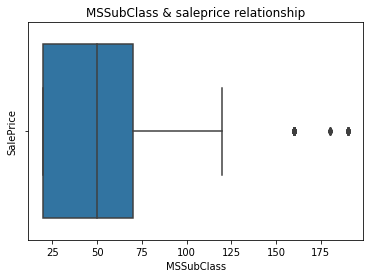

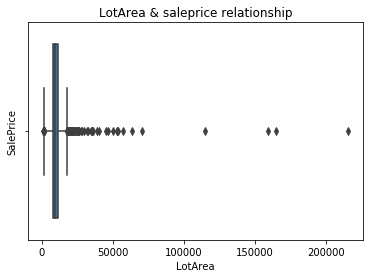

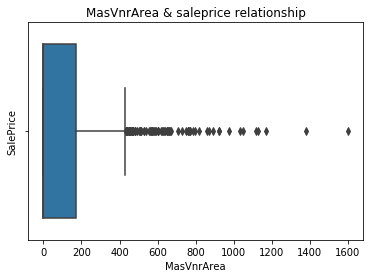

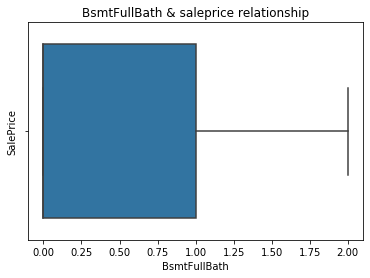

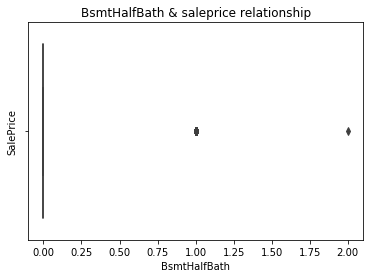

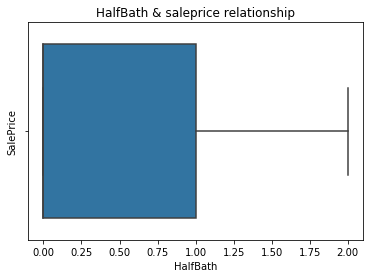

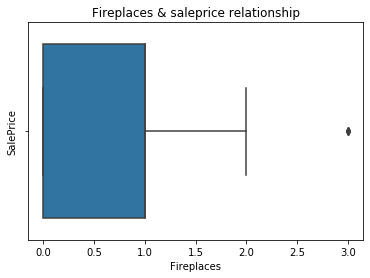

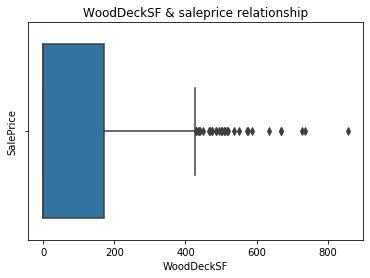

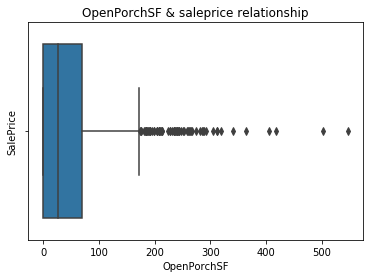

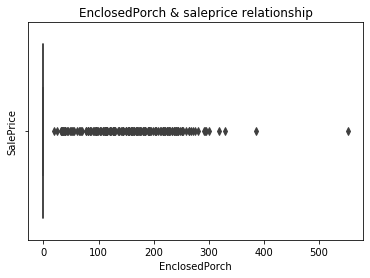

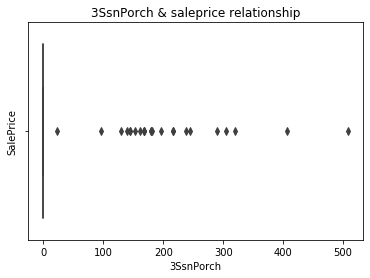

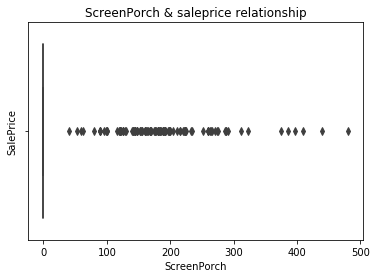

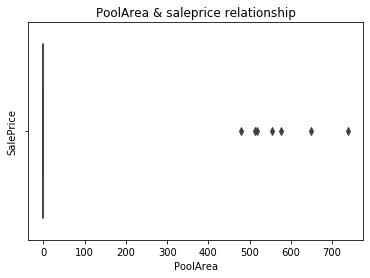

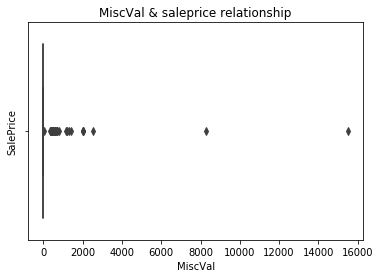

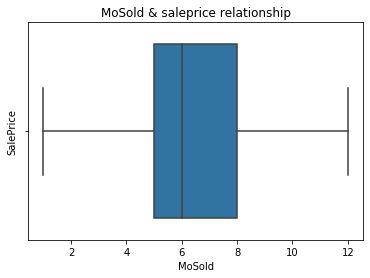

In [15]:
# box plot for outliers to see
cols = data_cleaned.loc[:,'MSSubClass': ]
for c in cols.columns:
    sns.boxplot(data[c])
    plt.xlabel(c)
    plt.ylabel('SalePrice')
    plt.title(c+' & saleprice relationship')
    plt.show()

### Remove the outliers

In [16]:
# removing the outliers 
from scipy import stats
idx = np.all(stats.zscore(data) < 3, axis=1)

# clean the data with idx 
data_cleaned = data[idx]
print('data with outliers',data.shape)
print('cleaned data',data_cleaned.shape)

data with outliers (1371, 37)
cleaned data (972, 37)


## let's split the test, train dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_cleaned.loc[:,'MSSubClass':'MoSold'], data_cleaned.SalePrice, test_size = 0.2)

## let's get the linear model instance from sklearn.linear_model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
# let's create the instance of LinearRegression
regressor = LinearRegression()

#fit the model 
regressor.fit(X_train, y_train)
print('Coefficients',regressor.coef_,'\n')
print('Intercept', regressor.intercept_,'\n')
#predict 

y_pred = regressor.predict(X_test)

Coefficients [-1.48824400e+02  1.12369207e+00  1.36892692e+04  4.31677946e+03
  4.57242267e+02  1.79860340e+02  1.00047469e+01  1.84519516e+01
  9.03069348e+00 -2.20341395e+00  2.52792311e+01  1.60390234e+01
  2.88471126e+01 -1.43539377e+01  3.05321983e+01  3.04264838e+03
  8.18545232e-12 -2.30238102e+03 -4.05359162e+03 -9.56743466e+03
 -9.09494702e-13  3.30472806e+03  4.65368791e+03 -7.67287677e+01
  6.06220985e+03  2.25909753e+01  9.76018486e+00  4.18623620e+01
  3.60762153e+01 -3.71420979e+02  2.97708589e+01  0.00000000e+00
 -3.63321640e+00  7.15687224e+02] 

Intercept -1170077.75661737 



In [20]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
n = data_cleaned.shape[0]
p = len(X_train.columns)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))

print('Rsquare ',r2)
print('Accuracy',regressor.score(X_train, y_train))
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)

print('F-statistics\t',fstat)
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred) )

Rsquare  0.8715719168749392
Accuracy 0.8849001747944789
AdjustedR_Square 0.8669117729835283
F-statistics	 187.02682517621835
MSE 427856291.67660457
MAE 15404.248986163346


### Trying  Regularization to fit model

In [21]:

# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
model = ridge.fit(X_train,y_train)
# Printing the average neg_mean_squared_error of a 10-fold cross validation


In [22]:
y_pred = model.predict(X_test)

In [23]:
r2= r2_score(y_test, y_pred)
n = data_cleaned.shape[0]
p = len(X_train.columns)
col = X_train.columns
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))

print('Rsquare ',r2)
print('Accuracy',regressor.score(X_train, y_train))
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)

print('F-statistics\t',fstat)
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred) )

Rsquare  0.872132395216795
Accuracy 0.8849001747944789
AdjustedR_Square 0.8674925888532635
F-statistics	 187.96741219023568
MSE 425989066.2296755
MAE 15247.916986019127


#### from the result Rsqaure and Adjusted Rsquare is good. & fstat is also indicating that the variables chosen are chosed correctly 

In [24]:
# Now let's normalise independent variable 

X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), data.SalePrice, test_size = 0.2)

print(data.shape)
from sklearn import preprocessing
X_train_nor = preprocessing.normalize(X_train)
X_test_nor = preprocessing.normalize(X_test)

(1371, 37)


In [25]:
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
model = ridge.fit(X_train_nor,y_train)
# Printing the average neg_mean_squared_error of a 10-fold cross validation

In [26]:
y_pred = model.predict(X_test_nor)
r2= r2_score(y_test, y_pred)
n = data_cleaned.shape[0]
p = len(col)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))

print('Rsquare ',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)

print('F-statistics\t',fstat)
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred) )

Rsquare  0.6446411116456301
AdjustedR_Square 0.631746552196272
F-statistics	 49.99326376192859
MSE 2053611464.024989
MAE 32119.025711493694


In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model = Lasso()

In [28]:
param_grid = [{'alpha':[1.0,0.0,0.1,0.01,0.001]}]
lasso = GridSearchCV(model, param_grid, cv=10)
lasso

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1.0, 0.0, 0.1, 0.01, 0.001]}])

In [31]:
lasso.fit(X_train_nor, y_train)
y_pred = lasso.predict(X_test_nor)


In [30]:
y_pred = lasso.predict(X_test_nor)
r2= r2_score(y_test, y_pred)
n = data_cleaned.shape[0]
p = len(col)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))

print('Rsquare ',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)

print('F-statistics\t',fstat)
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred) )

Rsquare  0.7051709565337867
AdjustedR_Square 0.6944727841988334
F-statistics	 65.915086657357
MSE 1703810776.74342
MAE 29150.894808905112
